## 2025년 천안시 데이터 분석 공모전


👉 주제:  기입필요<br><br>
👉자료출처: MDIS, 통계청<br><br>
👉분석순서
<ol start="0"> 
    <li>패키지 로드</li>
    <li>데이터 로드</li>
    <li>데이터 EDA</li>
    <li>변수 선정</li>
</ol>


### 0. 패키지 로드

In [1]:
# 패키지 로드
import glob 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 한글 폰트 설정 (Windows 예: 맑은 고딕 / Mac: AppleGothic / Linux: 나눔고딕)
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)  # 마이너스 깨짐 방지

### 1. 데이터 로드

#### ✅ 종속변수: 산업재해 현황

- 출처: MDIS 산업재해현황
- 기간: 21년~23년
- 종속변수 산출방식: 연령별 취합한 각 행 카운트 (연령과 연령별 산업재해환자 수로 구성)
- 데이터 탐색 과정 포함

✔️ MDIS 산업재해현황 통계코드<br><br>
<img src="0. 기타자료\연령별분류코드.png" alt="설명" width="400" height="400"/>
<img src="0. 기타자료\근속기간별분류코드.png" alt="설명" width="400" height="400"/>
<img src="0. 기타자료\업종별분류코드.png" alt="설명" width="400" height="400"/>

In [2]:
# 산업재해 데이터 위치
y_pathes = glob.glob('1. 기초자료/종속변수/*.csv')

# Occupational Accident 산재 현황 데이터 취합
file_list =[]
for path in y_pathes:
    file_list.append(pd.read_csv(path,encoding='cp949',low_memory=False))

oa_df = pd.concat(file_list)

# 지방관서를 천안 설정 (코드번호: 7210)
cheonan_oa = oa_df[oa_df['지방관서'] == 7210].copy()

cheonan_oa_df = cheonan_oa.groupby(['연령','기준년']).size().reset_index(name='산업재해')
print("패널구분: 연령 / 종속변수: 산업재해")

age = {
    1:"18세미만",
    2:"18세~24세",
    3:"25세~29세",
    4:"30세~34세",
    5:"35세~39세",
    6:"40세~44세",
    7:"45세~49세",
    8:"50세~54세",
    9:"55세~59세",
    16:"60세이상"
    }

cheonan_oa_df["연령코드해석"] = cheonan_oa_df['연령'].map(age)
# 18세 미만 제외 (지나치게 적음)
cheonan_oa_df = cheonan_oa_df[cheonan_oa_df["연령"] != 1].copy()
display(cheonan_oa_df)
cheonan_oa_df_final = cheonan_oa_df.copy()

패널구분: 연령 / 종속변수: 산업재해


,연령,기준년,산업재해,연령코드해석
2,2,2021,131,18세~24세
3,2,2022,125,18세~24세
4,2,2023,132,18세~24세
5,3,2021,214,25세~29세
6,3,2022,220,25세~29세
7,3,2023,229,25세~29세
8,4,2021,262,30세~34세
9,4,2022,264,30세~34세
10,4,2023,285,30세~34세
11,5,2021,271,35세~39세


🎯 산업재해 데이터 EDA

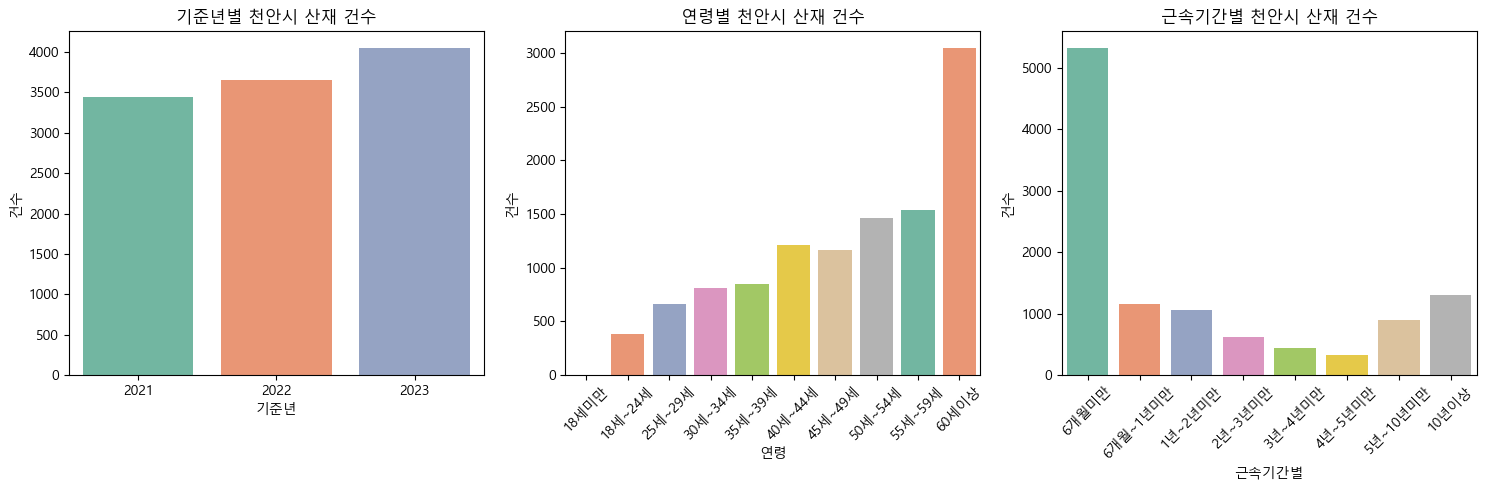

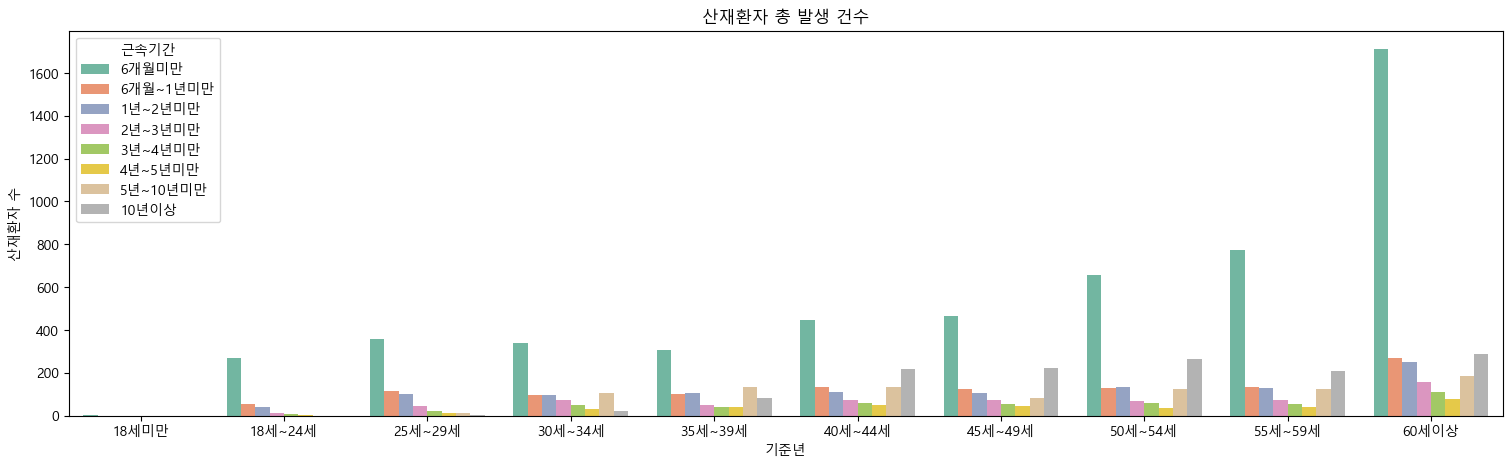

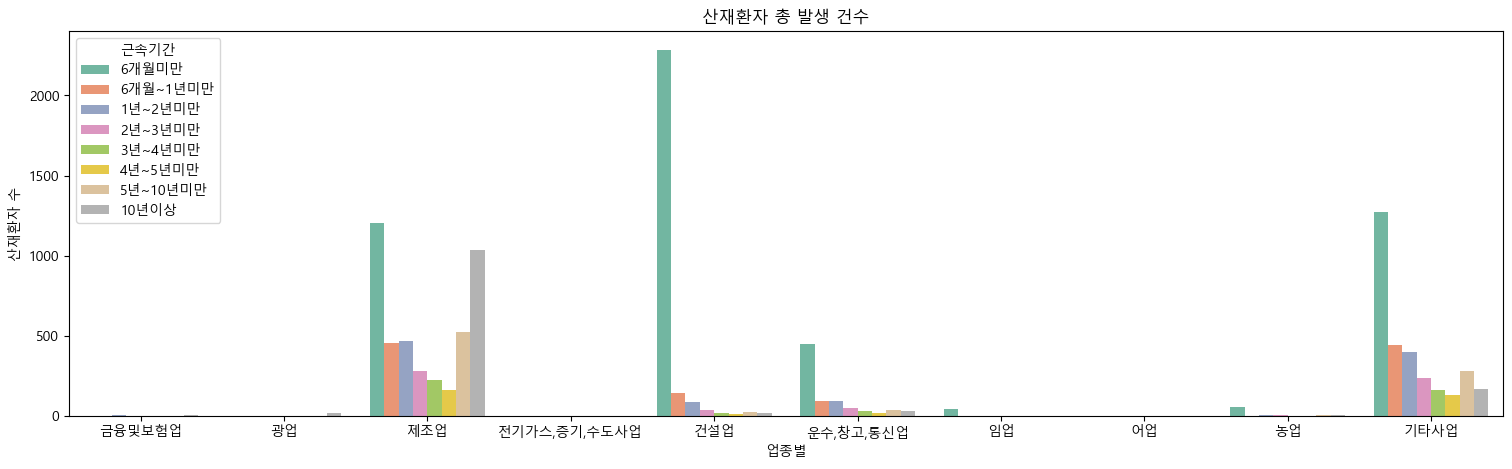

In [3]:
#데이터 시각화
'''주요코드정리'''
work_type = {
    0:'금융및보험업',
    1:'광업',
    2:'제조업',
    3:'전기가스,증기,수도사업',
    4:'건설업',
    5:'운수,창고,통신업',
    6:'임업',
    7:'어업',
    8:'농업',
    9:'기타사업'
}

age = {
    1:"18세미만",
    2:"18세~24세",
    3:"25세~29세",
    4:"30세~34세",
    5:"35세~39세",
    6:"40세~44세",
    7:"45세~49세",
    8:"50세~54세",
    9:"55세~59세",
    16:"60세이상"
    }

word_period = {
    '24':'6개월미만',
    '30':'6개월~1년미만',
    '40':'1년~2년미만',
    '50':'2년~3년미만',
    '60':'3년~4년미만',
    '70':'4년~5년미만',
    '80':'5년~10년미만',
    '93':'10년이상'
}

fig, axes = plt.subplots(1, 3, figsize=(15,5))  # 1행 3열, 가로로 3개 그래프

'''기준년별'''
count_oa = cheonan_oa.groupby(["기준년"]).size().reset_index(name="산재환자수")
sns.barplot(data=count_oa, x="기준년", y="산재환자수", hue="기준년",
            palette="Set2", errorbar=None, legend=False, ax=axes[0])
axes[0].set_title("기준년별 천안시 산재 건수")
axes[0].set_xlabel("기준년")
axes[0].set_ylabel("건수")

'''연령별'''
count_oa = cheonan_oa.groupby(["연령"]).size().reset_index(name="산재환자수")
count_oa['연령'] = count_oa.apply(lambda x: age[x['연령']],axis=1)
sns.barplot(data=count_oa, x="연령", y="산재환자수", hue="연령",
            palette="Set2", errorbar=None, legend=False, ax=axes[1])
axes[1].set_title("연령별 천안시 산재 건수")
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel("연령")
axes[1].set_ylabel("건수")

count_oa = cheonan_oa.groupby(["근속기간"]).size().reset_index(name="산재환자수")
count_oa['근속기간'] = count_oa.apply(lambda x: word_period[x['근속기간']],axis=1)
sns.barplot(data=count_oa, x="근속기간", y="산재환자수", hue="근속기간",
            palette="Set2", errorbar=None, legend=False, ax=axes[2])
axes[2].set_title("근속기간별 천안시 산재 건수")
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_xlabel("근속기간별")
axes[2].set_ylabel("건수")
plt.tight_layout()
plt.show()

'''근속기간, 연령별 시각화'''
plt.figure(figsize=(18.5,5)) 
count_oa = cheonan_oa.groupby(["근속기간",'연령']).size().reset_index(name="산재환자수")
count_oa['근속기간'] = count_oa.apply(lambda x: word_period[x['근속기간']],axis=1)
count_oa['연령'] = count_oa.apply(lambda x: age[x['연령']],axis=1)
sns.barplot(
    data=count_oa,
    x="연령",
    y="산재환자수",
    hue="근속기간",
    palette="Set2",
    errorbar=None   # 신뢰구간(검은 막대) 제거
)
plt.title("산재환자 총 발생 건수")
plt.xlabel("기준년")
plt.ylabel("산재환자 수")
plt.show()

'''업종별, 근속기간 시각화'''
plt.figure(figsize=(18.5,5)) 
count_oa = cheonan_oa.groupby(["근속기간",'대업종']).size().reset_index(name="산재환자수")
count_oa['근속기간'] = count_oa.apply(lambda x: word_period[x['근속기간']],axis=1)
count_oa['대업종'] = count_oa.apply(lambda x: work_type[x['대업종']],axis=1)
sns.barplot(
    data=count_oa,
    x="대업종",
    y="산재환자수",
    hue="근속기간",
    palette="Set2",
    errorbar=None   # 신뢰구간(검은 막대) 제거
)
plt.title("산재환자 총 발생 건수")
plt.xlabel("업종별")
plt.ylabel("산재환자 수")
plt.show()

#### ✅ 독립변수: 근로환경만족도

- 출처: 통계청 (천안시)
- 기간: 23년
- 독립변수: 연령별로 분류한 뒤 각 기준년별로 일괄 적용 (비긍정 데이터만 취합)

In [4]:
# 데이터 로드
job_satisfaction = pd.read_csv(r'1. 기초자료\입력변수\천안시_근로환경만족도_2023.csv')
job_satisfaction = job_satisfaction[job_satisfaction['특성별(1)'] =='연령별'].copy()

# 컬럼 정리
job_satisfaction.columns = ['구분','연령','근로환경_매우불만족','근로환경_불만족','근로환경_보통','근로환경_만족','근로환경_매우만족']

# 컬럼 숫자형식으로 통일
job_satisfaction[['근로환경_매우불만족','근로환경_불만족','근로환경_보통','근로환경_만족','근로환경_매우만족']] = \
    job_satisfaction[['근로환경_매우불만족','근로환경_불만족','근로환경_보통','근로환경_만족','근로환경_매우만족']].astype('float')

# 비긍정비율 합산
job_satisfaction['근로환경_비긍정비율'] = job_satisfaction['근로환경_매우불만족'] + job_satisfaction['근로환경_불만족']  + job_satisfaction['근로환경_보통'] 

print('근로환경만족도 통계표')
display(job_satisfaction)
print()

# 기존 종속변수와 비긍정데이터 결합
cheonan_oa_df_final['근로환경_비긍정비율'] = cheonan_oa_df_final.apply(
    lambda x: job_satisfaction[job_satisfaction['연령']=='19~34세']['근로환경_비긍정비율'].values[0] if x['연령'] <=4 
    else job_satisfaction[job_satisfaction['연령']=='35~49세']['근로환경_비긍정비율'].values[0] if x['연령'] <=7
    else job_satisfaction[job_satisfaction['연령']=='50~64세']['근로환경_비긍정비율'].values[0],axis=1 ,)

print('근로환경만족도 (2023년) + 종속변수 데이터 결과 상위 5행')
display(cheonan_oa_df_final.head())

근로환경만족도 통계표


,구분,연령,근로환경_매우불만족,근로환경_불만족,근로환경_보통,근로환경_만족,근로환경_매우만족,근로환경_비긍정비율
6,연령별,19~34세,0.8,8.7,39.2,42.4,8.9,48.7
7,연령별,35~49세,1.5,6.5,36.0,44.9,11.0,44.0
8,연령별,50~64세,2.3,14.2,42.8,33.3,7.3,59.3



근로환경만족도 (2023년) + 종속변수 데이터 결과 상위 5행


,연령,기준년,산업재해,연령코드해석,근로환경_비긍정비율
2,2,2021,131,18세~24세,48.7
3,2,2022,125,18세~24세,48.7
4,2,2023,132,18세~24세,48.7
5,3,2021,214,25세~29세,48.7
6,3,2022,220,25세~29세,48.7


#### ✅ 독립변수: 기상개황

- 출처: 통계청 (천안시)
- 기간: 21년 ~ 23년
- 적용방법: 각 기상요인 평균값을 구한 뒤 각 기준년별로 일괄 적용 

In [5]:
# 천안시 기상 데이터 CSV 불러오기
wealther = pd.read_csv(r'1. 기초자료\입력변수\천안시_기상개황.csv')

wealther = wealther.T # 데이터의 행과 열을 전치
wealther.columns = wealther.iloc[0] # 첫 번째 행을 컬럼 이름으로 설정
wealther = wealther[['월별(1)','합계']].copy() # 필요한 열(월별, 합계)만 선택
wealther = wealther.iloc[1:] # 첫 번째 행 제거 (이미 컬럼명으로 사용했으므로)

wealther.columns = ['구분','구분2','결과'] # 열 이름을 ‘구분’, ‘구분2’, ‘결과’로 재정의
wealther = wealther.reset_index(names='기준년') # 기존 인덱스를 ‘기준년’이라는 이름의 컬럼으로 변환
wealther = wealther[wealther['구분'].isin(['기온 (℃)', '강수량 (㎜)','상대습도 (%)', '바람 (㎧)'])] # 기온, 강수량, 습도, 바람에 해당하는 행만 추출

wealther['기준년'] = wealther['기준년'].str.slice(0,4).astype('int') # 기준년에서 연도 앞 4자리만 추출하고 정수형으로 변환
wealther = wealther[wealther['구분2'].isin(['평균','소계','평균풍속'])].copy() # 구분2 값이 평균, 소계, 평균풍속인 행만 필터링
wealther = wealther.pivot(index='기준년',columns='구분',values='결과') # 기준년을 행 인덱스로 하고, 구분을 열로 하여 결과값을 매트릭스로 재구성
print('천안시 연평균 기상데이터')
display(wealther)

# 기존 데이터 + 기상데이터 결합
cheonan_oa_df_final = pd.merge(cheonan_oa_df_final,wealther,on='기준년',how='left')
print('기존데이터 + 기상데이터 결합한 상위 5개행')
display(cheonan_oa_df_final.head())

천안시 연평균 기상데이터


구분,강수량 (㎜),기온 (℃),바람 (㎧),상대습도 (%)
기준년,,,,
2018,1163.4,11.8,1.6,65.0
2019,845.6,12.0,1.3,69.0
2020,1443.5,12.2,1.3,75.0
2021,1058.9,12.5,1.3,76.0
2022,1080.7,12.0,1.2,74.0
2023,1502.5,13.0,1.2,74.0


기존데이터 + 기상데이터 결합한 상위 5개행


,연령,기준년,산업재해,연령코드해석,근로환경_비긍정비율,강수량 (㎜),기온 (℃),바람 (㎧),상대습도 (%)
0,2,2021,131,18세~24세,48.7,1058.9,12.5,1.3,76.0
1,2,2022,125,18세~24세,48.7,1080.7,12.0,1.2,74.0
2,2,2023,132,18세~24세,48.7,1502.5,13.0,1.2,74.0
3,3,2021,214,25세~29세,48.7,1058.9,12.5,1.3,76.0
4,3,2022,220,25세~29세,48.7,1080.7,12.0,1.2,74.0


#### ✅ 독립변수: 소비자물가지수

- 출처: 통계청 (천안시)
- 기간: 21년 ~ 23년
- 적용방법: 

In [6]:
# 소비자 물가지수
market_price = pd.read_csv(r'1. 기초자료\입력변수\천안시_소비자물가지수.csv')
market_price = market_price.T
market_price.columns = market_price.iloc[0]
market_price = market_price.iloc[1:]
market_price = market_price.drop(columns=['총지수'])
market_price.columns =[f"소비자물가지수({x})" for x in market_price.columns]
market_price = market_price.reset_index(names='기준년').astype("int")
market_price = market_price[market_price['기준년'].isin([2021,2022,2023])].copy()

print('천안시 소비자 물가지수 ')
display(market_price)

# 기존 데이터 + 소비자물가지수데이터 결합
cheonan_oa_df_final = pd.merge(cheonan_oa_df_final,market_price,on='기준년',how='left')
print('기존데이터 + 소비자물가지수데이터 결합한 상위 5개행')
display(cheonan_oa_df_final.head())

천안시 소비자 물가지수 


,기준년,소비자물가지수(식료품· 비주류음료),소비자물가지수(주류· 담배),소비자물가지수(의류·신발),"소비자물가지수(주택, 수도, 전기 및 연료)",소비자물가지수(가정용품 및 가사서비스),소비자물가지수(보건),소비자물가지수(교통),소비자물가지수(통신),소비자물가지수(오락 및 문화),소비자물가지수(교육),소비자물가지수(음식 및 숙박),소비자물가지수(기타 상품 및 서비스)
3,2021,105,100,100,102,101,99,107,99,100,99,102,102
4,2022,112,102,103,110,106,100,118,100,103,99,109,107
5,2023,118,103,110,117,112,102,113,100,107,102,115,112


기존데이터 + 소비자물가지수데이터 결합한 상위 5개행


,연령,기준년,산업재해,연령코드해석,근로환경_비긍정비율,강수량 (㎜),기온 (℃),바람 (㎧),상대습도 (%),소비자물가지수(식료품· 비주류음료),...,소비자물가지수(의류·신발),"소비자물가지수(주택, 수도, 전기 및 연료)",소비자물가지수(가정용품 및 가사서비스),소비자물가지수(보건),소비자물가지수(교통),소비자물가지수(통신),소비자물가지수(오락 및 문화),소비자물가지수(교육),소비자물가지수(음식 및 숙박),소비자물가지수(기타 상품 및 서비스)
0,2,2021,131,18세~24세,48.7,1058.9,12.5,1.3,76.0,105,...,100,102,101,99,107,99,100,99,102,102
1,2,2022,125,18세~24세,48.7,1080.7,12.0,1.2,74.0,112,...,103,110,106,100,118,100,103,99,109,107
2,2,2023,132,18세~24세,48.7,1502.5,13.0,1.2,74.0,118,...,110,117,112,102,113,100,107,102,115,112
3,3,2021,214,25세~29세,48.7,1058.9,12.5,1.3,76.0,105,...,100,102,101,99,107,99,100,99,102,102
4,3,2022,220,25세~29세,48.7,1080.7,12.0,1.2,74.0,112,...,103,110,106,100,118,100,103,99,109,107


#### ✅ 독립변수: 연령별 취업자

- 출처: 통계청 (천안시)
- 기간: 21년 ~ 23년
- 적용방법: (단위 파악 필요)

In [30]:
worker = pd.read_csv('1. 기초자료/입력변수/천안시_연령별_취업자.csv')
worker = worker.T
worker.columns = worker.iloc[0]
worker = worker.iloc[2:]
worker[['상반기','하반기']]=worker[['상반기','하반기']].astype(float)
worker['총합'] = worker[['상반기','하반기']].sum(axis=1)
worker = worker.reset_index(names="기준년")
worker['기준년'] = worker['기준년'].str.slice(0,4).astype(int)
worker =  worker[['기준년','반기별(1)','총합']]
worker.columns = ['기준년','연령','취업자']
worker = worker[worker['연령'] !='합계']

# 종속변수에 맞게 연령별 매핑
age_dummy_code = {
    "15~29세": [2,3],
    "30~49세": [4,5,6,7],
    "50~64세": [8,9],
    "65세이상": [16]
}
age_df = pd.DataFrame(age_dummy_code.items(), columns=["연령","코드"])

age_df = age_df.explode("코드")   # 리스트 풀어서 여러 행으로 변환
worker = pd.merge(worker,age_df,on='연령',how='left')
worker.columns = ['기준년','연령구간','취업자','연령']
worker = worker[worker['기준년'] >=2021].copy()

print('연령별 기준년별 취업자 수 상위 3개행')
display(worker.head(3))

# 기존 데이터 + 기준년별 취업자수 데이터
cheonan_oa_df_final = pd.merge(cheonan_oa_df_final,worker[['기준년','연령','취업자']],on=['연령','기준년'],how='left')
print('기존데이터 + 기준년별 취업자수 데이터 취합 상위 3개')
display(cheonan_oa_df_final.head(3))

연령별 기준년별 취업자 수 상위 3개행


,기준년,연령구간,취업자,연령
18,2021,15~29세,123.1,2
19,2021,15~29세,123.1,3
20,2021,30~49세,359.3,4


기존데이터 + 기준년별 취업자수 데이터 취합 상위 3개


,연령,기준년,산업재해,연령코드해석,근로환경_비긍정비율,강수량 (㎜),기온 (℃),바람 (㎧),상대습도 (%),소비자물가지수(식료품· 비주류음료),...,"소비자물가지수(주택, 수도, 전기 및 연료)",소비자물가지수(가정용품 및 가사서비스),소비자물가지수(보건),소비자물가지수(교통),소비자물가지수(통신),소비자물가지수(오락 및 문화),소비자물가지수(교육),소비자물가지수(음식 및 숙박),소비자물가지수(기타 상품 및 서비스),취업자
0,2,2021,131,18세~24세,48.7,1058.9,12.5,1.3,76.0,105,...,102,101,99,107,99,100,99,102,102,123.1
1,2,2022,125,18세~24세,48.7,1080.7,12.0,1.2,74.0,112,...,110,106,100,118,100,103,99,109,107,126.1
2,2,2023,132,18세~24세,48.7,1502.5,13.0,1.2,74.0,118,...,117,112,102,113,100,107,102,115,112,124.3


#### ✅ 독립변수: 일의 내용 만족도

- 출처: 통계청 (천안시)
- 기간: 23년
- 적용방법: (단위 파악 필요)

In [37]:
# 데이터 로드
work_satisfaction = pd.read_csv(r'1. 기초자료\입력변수\천안시_일의_내용_만족도_2023.csv')
work_satisfaction = work_satisfaction[work_satisfaction['특성별(1)'] =='연령별'].copy()

# 컬럼 정리
work_satisfaction.columns = ['구분','연령','일의내용_매우불만족','일의내용_불만족','일의내용_보통','일의내용_만족','일의내용_매우만족']

# 컬럼 숫자형식으로 통일
work_satisfaction[['일의내용_매우불만족','일의내용_불만족','일의내용_보통','일의내용_만족','일의내용_매우만족']] = \
    work_satisfaction[['일의내용_매우불만족','일의내용_불만족','일의내용_보통','일의내용_만족','일의내용_매우만족']].astype('float')

# 비긍정비율 합산
work_satisfaction['일의내용_비긍정비율'] = work_satisfaction['일의내용_매우불만족'] + work_satisfaction['일의내용_불만족']  + work_satisfaction['일의내용_보통'] 

print('일의 내용 만족도 통계표')
display(work_satisfaction)
print()

# 기존 종속변수와 비긍정데이터 결합
cheonan_oa_df_final['일의내용_비긍정비율'] = cheonan_oa_df_final.apply(
    lambda x: work_satisfaction[work_satisfaction['연령']=='19~34세']['일의내용_비긍정비율'].values[0] if x['연령'] <=4 
    else work_satisfaction[work_satisfaction['연령']=='35~49세']['일의내용_비긍정비율'].values[0] if x['연령'] <=7
    else work_satisfaction[work_satisfaction['연령']=='50~64세']['일의내용_비긍정비율'].values[0],axis=1 ,)

print('일의 내용 만족도 (2023년) + 종속변수 데이터 결과 상위 5행')
display(cheonan_oa_df_final.head())

일의 내용 만족도 통계표


,구분,연령,일의내용_매우불만족,일의내용_불만족,일의내용_보통,일의내용_만족,일의내용_매우만족,일의내용_비긍정비율
6,연령별,19~34세,0.9,4.8,44.8,40.8,8.7,50.5
7,연령별,35~49세,0.8,6.1,39.4,44.3,9.4,46.3
8,연령별,50~64세,2.1,9.8,46.9,33.8,7.5,58.8



일의 내용 만족도 (2023년) + 종속변수 데이터 결과 상위 5행


,연령,기준년,산업재해,연령코드해석,근로환경_비긍정비율,강수량 (㎜),기온 (℃),바람 (㎧),상대습도 (%),소비자물가지수(식료품· 비주류음료),...,소비자물가지수(가정용품 및 가사서비스),소비자물가지수(보건),소비자물가지수(교통),소비자물가지수(통신),소비자물가지수(오락 및 문화),소비자물가지수(교육),소비자물가지수(음식 및 숙박),소비자물가지수(기타 상품 및 서비스),취업자,일의내용_비긍정비율
0,2,2021,131,18세~24세,48.7,1058.9,12.5,1.3,76.0,105,...,101,99,107,99,100,99,102,102,123.1,50.5
1,2,2022,125,18세~24세,48.7,1080.7,12.0,1.2,74.0,112,...,106,100,118,100,103,99,109,107,126.1,50.5
2,2,2023,132,18세~24세,48.7,1502.5,13.0,1.2,74.0,118,...,112,102,113,100,107,102,115,112,124.3,50.5
3,3,2021,214,25세~29세,48.7,1058.9,12.5,1.3,76.0,105,...,101,99,107,99,100,99,102,102,123.1,50.5
4,3,2022,220,25세~29세,48.7,1080.7,12.0,1.2,74.0,112,...,106,100,118,100,103,99,109,107,126.1,50.5


#### ✅ 독립변수: 천안시 지방재정자립지표

- 출처: 통계청 (천안시)
- 기간: 21~23년
- 적용방법: (단위 파악 필요)

In [59]:
tax_independ = pd.read_csv(r'1. 기초자료\입력변수\천안시_지방재정자립지표.csv')
tax_independ = tax_independ.T
tax_independ.columns = tax_independ.iloc[0]
tax_independ = tax_independ.iloc[2:]
tax_independ = tax_independ.reset_index(names='기준년')
tax_independ.columns = ['기준년', '재정자립도', '재정자주도', '기준재정 수요충족도(재정력지수)']
tax_independ['기준년'] = tax_independ['기준년'].astype(int)
print('천안시 지방재정자립지표')
display(tax_independ)
print()
print('기존데이터 + 지방재정자립지표 결합 상위 3개행')
cheonan_oa_df_final = pd.merge(cheonan_oa_df_final,tax_independ,on='기준년',how='left')
display(cheonan_oa_df_final.head(3))

천안시 지방재정자립지표


,기준년,재정자립도,재정자주도,기준재정 수요충족도(재정력지수)
0,2021,33.93,53.53,65.09
1,2022,31.83,54.51,66.66
2,2023,30.82,52.11,59.1



기존데이터 + 지방재정자립지표 결합 상위 3개행


,연령,기준년,산업재해,연령코드해석,근로환경_비긍정비율,강수량 (㎜),기온 (℃),바람 (㎧),상대습도 (%),소비자물가지수(식료품· 비주류음료),...,소비자물가지수(통신),소비자물가지수(오락 및 문화),소비자물가지수(교육),소비자물가지수(음식 및 숙박),소비자물가지수(기타 상품 및 서비스),취업자,일의내용_비긍정비율,재정자립도,재정자주도,기준재정 수요충족도(재정력지수)
0,2,2021,131,18세~24세,48.7,1058.9,12.5,1.3,76.0,105,...,99,100,99,102,102,123.1,50.5,33.93,53.53,65.09
1,2,2022,125,18세~24세,48.7,1080.7,12.0,1.2,74.0,112,...,100,103,99,109,107,126.1,50.5,31.83,54.51,66.66
2,2,2023,132,18세~24세,48.7,1502.5,13.0,1.2,74.0,118,...,100,107,102,115,112,124.3,50.5,30.82,52.11,59.1


#### ✅ 독립변수: 천안시 평소 근무 시간

- 출처: 통계청 (천안시)
- 기간: 21~23년
- 적용방법: (단위 파악 필요)

In [ ]:
work_time = pd.read_csv(r'1. 기초자료\입력변수\천안시_평소_근무_시간_2023.csv')
work_time = work_time[work_time['특성별(1)'] =='연령별'].copy()
# 컬럼 정리
work_time.columns = ['구분','연령','근무시간(1~16시간)','근무시간(17~35시간)','근무시간(36~52시간)','근무시간(53시간 이상)']
# 컬럼 숫자형식으로 통일
work_time[['근무시간(1~16시간)','근무시간(17~35시간)','근무시간(36~52시간)','근무시간(53시간 이상)']] = \
    work_time[['근무시간(1~16시간)','근무시간(17~35시간)','근무시간(36~52시간)','근무시간(53시간 이상)']].astype('float')

print('2023년 천안시 평소 주당 근무 시간')
display(work_time)

# 기존 종속변수와 각 근무시간 결합
for col in ['근무시간(1~16시간)','근무시간(17~35시간)','근무시간(36~52시간)','근무시간(53시간 이상)']:
    cheonan_oa_df_final[col] = cheonan_oa_df_final.apply(
        lambda x: work_time[work_time['연령']=='19~34세'][col].values[0] if x['연령'] <=4 
        else work_time[work_time['연령']=='35~49세'][col].values[0] if x['연령'] <=7
        else work_time[work_time['연령']=='50~64세'][col].values[0],axis=1 ,)
    
print('평소주당근무시간 + 기존데이터 결합한 상위 3개 행')
display(cheonan_oa_df_final.head(3))

2023년 천안시 평소 주당 근무 시간


,구분,연령,근무시간(1~16시간),근무시간(17~35시간),근무시간(36~52시간),근무시간(53시간 이상)
6,연령별,19~34세,4.1,6.7,82.0,7.1
7,연령별,35~49세,2.9,6.6,84.0,6.5
8,연령별,50~64세,3.4,12.4,74.4,9.8


평소주당근무시간 + 기존데이터 결합한 상위 3개 행


,연령,기준년,산업재해,연령코드해석,근로환경_비긍정비율,강수량 (㎜),기온 (℃),바람 (㎧),상대습도 (%),소비자물가지수(식료품· 비주류음료),...,소비자물가지수(기타 상품 및 서비스),취업자,일의내용_비긍정비율,재정자립도,재정자주도,기준재정 수요충족도(재정력지수),근무시간(1~16시간),근무시간(17~35시간),근무시간(36~52시간),근무시간(53시간 이상)
0,2,2021,131,18세~24세,48.7,1058.9,12.5,1.3,76.0,105,...,102,123.1,50.5,33.93,53.53,65.09,4.1,6.7,82.0,7.1
1,2,2022,125,18세~24세,48.7,1080.7,12.0,1.2,74.0,112,...,107,126.1,50.5,31.83,54.51,66.66,4.1,6.7,82.0,7.1
2,2,2023,132,18세~24세,48.7,1502.5,13.0,1.2,74.0,118,...,112,124.3,50.5,30.82,52.11,59.1,4.1,6.7,82.0,7.1


#### ✅ 독립변수: 천안시 지방재정자립지표

- 출처: 통계청 (천안시)
- 기간: 21~23년
- 적용방법: (단위 파악 필요)

In [68]:
    cheonan_oa_df_final.apply(
        lambda x: work_time[work_time['연령']=='19~34세'][col].values[0] if x['연령'] <=4 
        else work_time[work_time['연령']=='35~49세'][col].values[0] if x['연령'] <=7
        else work_time[work_time['연령']=='50~64세'][col].values[0],axis=1 ,)

0     7.1
1     7.1
2     7.1
3     7.1
4     7.1
5     7.1
6     7.1
7     7.1
8     7.1
9     6.5
10    6.5
11    6.5
12    6.5
13    6.5
14    6.5
15    6.5
16    6.5
17    6.5
18    9.8
19    9.8
20    9.8
21    9.8
22    9.8
23    9.8
24    9.8
25    9.8
26    9.8
dtype: float64

In [ ]:
cheonan_oa_df_final[col] = 

In [60]:
cheonan_oa_df_final

,연령,기준년,산업재해,연령코드해석,근로환경_비긍정비율,강수량 (㎜),기온 (℃),바람 (㎧),상대습도 (%),소비자물가지수(식료품· 비주류음료),...,소비자물가지수(통신),소비자물가지수(오락 및 문화),소비자물가지수(교육),소비자물가지수(음식 및 숙박),소비자물가지수(기타 상품 및 서비스),취업자,일의내용_비긍정비율,재정자립도,재정자주도,기준재정 수요충족도(재정력지수)
0,2,2021,131,18세~24세,48.7,1058.9,12.5,1.3,76.0,105,...,99,100,99,102,102,123.1,50.5,33.93,53.53,65.09
1,2,2022,125,18세~24세,48.7,1080.7,12.0,1.2,74.0,112,...,100,103,99,109,107,126.1,50.5,31.83,54.51,66.66
2,2,2023,132,18세~24세,48.7,1502.5,13.0,1.2,74.0,118,...,100,107,102,115,112,124.3,50.5,30.82,52.11,59.1
3,3,2021,214,25세~29세,48.7,1058.9,12.5,1.3,76.0,105,...,99,100,99,102,102,123.1,50.5,33.93,53.53,65.09
4,3,2022,220,25세~29세,48.7,1080.7,12.0,1.2,74.0,112,...,100,103,99,109,107,126.1,50.5,31.83,54.51,66.66
5,3,2023,229,25세~29세,48.7,1502.5,13.0,1.2,74.0,118,...,100,107,102,115,112,124.3,50.5,30.82,52.11,59.1
6,4,2021,262,30세~34세,48.7,1058.9,12.5,1.3,76.0,105,...,99,100,99,102,102,359.3,50.5,33.93,53.53,65.09
7,4,2022,264,30세~34세,48.7,1080.7,12.0,1.2,74.0,112,...,100,103,99,109,107,356.8,50.5,31.83,54.51,66.66
8,4,2023,285,30세~34세,48.7,1502.5,13.0,1.2,74.0,118,...,100,107,102,115,112,352.9,50.5,30.82,52.11,59.1
9,5,2021,271,35세~39세,44.0,1058.9,12.5,1.3,76.0,105,...,99,100,99,102,102,359.3,46.3,33.93,53.53,65.09
